In [31]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
m = 1000
X = 2 * np.random.randn(m, 1)
Y = 12.467 + 5.3 *X + np.random.randn(m,1)

X_a = add_dummy_feature(X)
print(X)
print(Y)

[[-6.60697037e-01]
 [-1.34392980e+00]
 [-2.61111331e+00]
 [ 1.52021617e+00]
 [ 2.25794126e+00]
 [ 1.94893216e+00]
 [-2.75842714e-01]
 [-6.94772849e-02]
 [ 3.04915372e-01]
 [-1.77059194e-02]
 [-7.47031818e-01]
 [ 4.73940279e-01]
 [ 2.52556864e+00]
 [-1.64139287e+00]
 [-1.34778456e+00]
 [-5.32407667e-02]
 [-2.36669015e-01]
 [-3.27773751e-01]
 [-1.81571281e+00]
 [-1.43003863e+00]
 [ 2.66781302e+00]
 [ 1.63132996e+00]
 [ 6.00796897e-01]
 [-8.62503829e-01]
 [ 3.17455264e+00]
 [ 2.60717379e+00]
 [ 9.39813902e-01]
 [ 1.42554375e+00]
 [-1.39711293e+00]
 [-1.41486107e+00]
 [-2.19196778e+00]
 [ 4.81286056e-01]
 [ 1.56913311e+00]
 [-2.44811460e+00]
 [ 2.73967938e+00]
 [-2.51343781e+00]
 [-1.90763167e+00]
 [ 2.98512198e+00]
 [-3.66532814e-01]
 [-8.92808024e-01]
 [-1.51753053e+00]
 [ 1.53006681e-01]
 [-1.78928257e+00]
 [ 2.63765525e+00]
 [ 1.61240101e+00]
 [ 7.97803862e-01]
 [-2.85146451e+00]
 [-5.29658856e-01]
 [-1.20714363e-01]
 [-8.02517096e-02]
 [-1.71723716e+00]
 [ 9.85278610e-01]
 [-2.4699276

In [32]:
result = np.linalg.inv(X_a.T @ X_a) @ X_a.T @ Y
#result = np.linalg.pinv(X_a) @ Y
#result, residuals, rank, s = np.linalg.lstsq(X_a, Y, rcond=None)
print(result)

[[12.43351666]
 [ 5.29453743]]


In [33]:
X_new = 2 * np.random.randn(200, 1)
Y_true = 12.467 + 5.3 *X_new + np.random.randn(200,1)
X_new_a = add_dummy_feature(X_new)
Y_pred = X_new_a @ result
Y_pred

array([[ 24.41209213],
       [ 35.54262055],
       [  2.54884459],
       [ 16.2230928 ],
       [ 27.44272287],
       [ 20.60590514],
       [ -1.47177547],
       [ 19.67991684],
       [  8.40624175],
       [ 16.46733845],
       [ 18.79204043],
       [ 22.44723318],
       [ 17.0790164 ],
       [ 15.70343022],
       [ -0.29436252],
       [ 18.96542252],
       [ 14.12323208],
       [  8.14087709],
       [ 22.91952687],
       [  6.76450471],
       [ 21.61591804],
       [ 20.88109996],
       [  6.47025696],
       [ 33.70451299],
       [ 30.06497915],
       [ 28.23317477],
       [ -1.11534956],
       [ 15.30745728],
       [ 12.33471227],
       [ -4.22697013],
       [ 19.81966674],
       [ 22.90930142],
       [  9.74682262],
       [  6.34578823],
       [  0.74352182],
       [ 17.84508461],
       [ 17.13966153],
       [ 15.55055659],
       [  5.28906607],
       [ 11.58211475],
       [ 24.31165304],
       [ 11.8054853 ],
       [ 18.34889489],
       [ 24

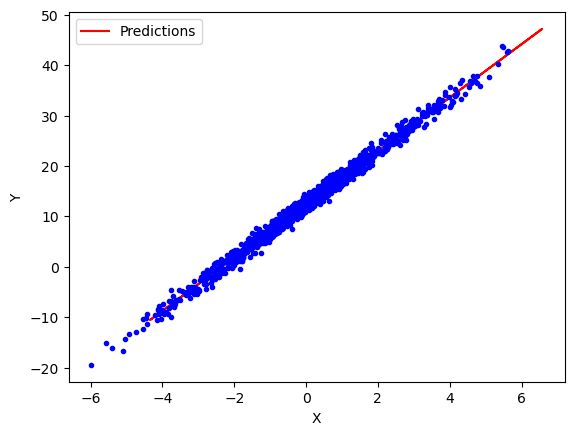

In [34]:
plt.plot(X_new, Y_pred, "r-", label="Predictions")
plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [35]:
mse = np.mean((Y_true - Y_pred)**2)


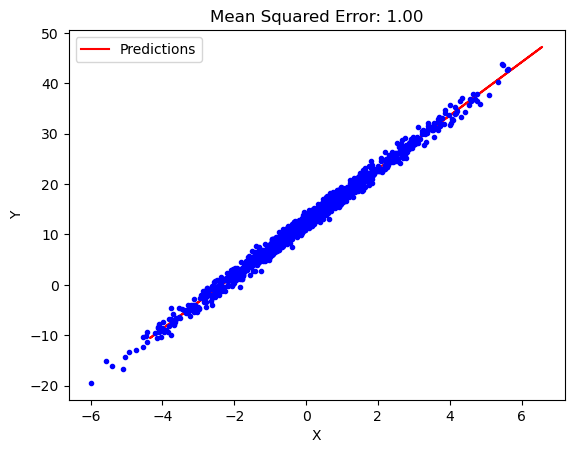

In [36]:
plt.plot(X_new, Y_pred, "r-", label="Predictions")
plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title(f"Mean Squared Error: {mse:.2f}")
plt.show()

[[12.43351664]
 [ 5.29453743]]


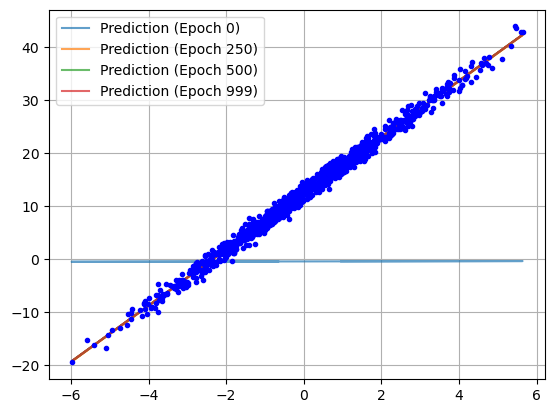

In [37]:
eta = 0.01
n_epochs = 1000
theta = np.random.randn(2,1)
n = len(X_a)



for epochs in range(n_epochs):
    mse_grad = 2 / n * X_a.T @ (X_a @ theta - Y)
    theta = theta - eta * mse_grad 
    if epochs in [0, int(n_epochs / 4), int(n_epochs / 2), n_epochs - 1]:
        plt.plot(X, X_a @ theta, label=f"Prediction (Epoch {epochs})", alpha=0.7)
        
print(theta)

plt.plot(X, Y, "b.")
plt.legend()
plt.grid()
plt.show()

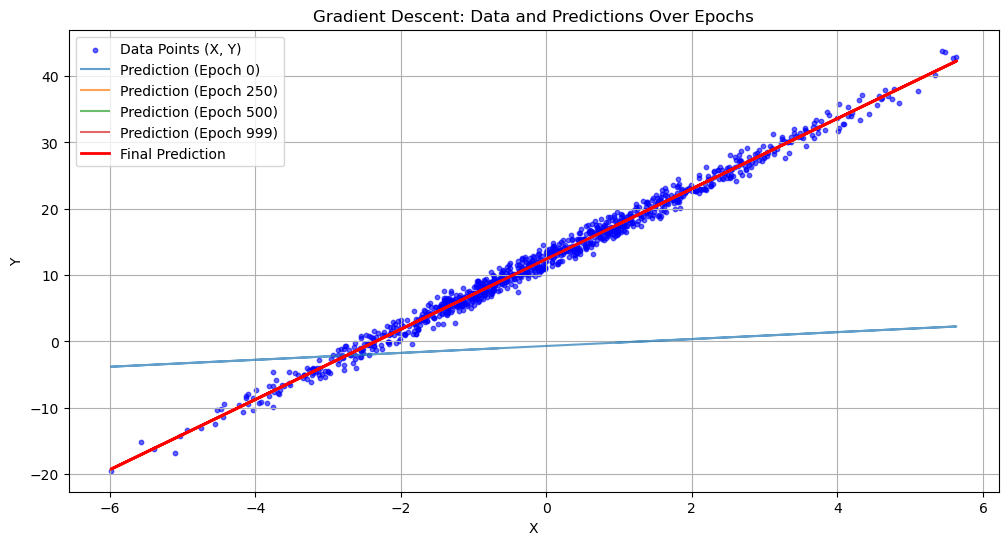

Final theta values: [[12.43351664]
 [ 5.29453743]]


In [38]:

eta = 0.01
n_epochs = 1000
theta = np.random.randn(2, 1)
n = len(X_a)

theta_constant_history = []
predictions_epochs = []

for epochs in range(n_epochs):
    mse_grad = 2 / n * X_a.T @ (X_a @ theta - Y)
    theta = theta - eta * mse_grad
    if epochs in [0, int(n_epochs / 4), int(n_epochs / 2), n_epochs - 1]:
        predictions_epochs.append((epochs, X_a @ theta))

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, color="blue", s=10, alpha=0.6, label="Data Points (X, Y)")

for epoch, predictions in predictions_epochs:
    plt.plot(X, predictions, label=f"Prediction (Epoch {epoch})", alpha=0.7)

plt.plot(X, X_a @ theta, "r-", label="Final Prediction", linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gradient Descent: Data and Predictions Over Epochs")
plt.legend()
plt.grid()
plt.show()

print("Final theta values:", theta)


In [39]:

def mse_grad_f(X, Y, theta):
    return 2 / len(X) * X.T @ (X @ theta - Y)

eta = 0.01
n_epochs = 1000 
theta = np.random.randn(2, 1)
batch_size = 50
n = len(X_a)

for epoch in range(n_epochs):
    idxs = np.random.permutation(n)
    X_shuffled = X_a[idxs]
    Y_shuffled = Y[idxs]
    
    for i in range(0, n, batch_size):
        X_batch = X_shuffled[i:i + batch_size]
        Y_batch = Y_shuffled[i:i + batch_size]
        mse_grad = mse_grad_f(X_batch, Y_batch, theta) 
        theta = theta - eta * mse_grad

print("Final theta values (Mini-Batch Gradient Descent):", theta)


Final theta values (Mini-Batch Gradient Descent): [[12.43129958]
 [ 5.29223128]]


In [40]:
sgd = SGDRegressor(max_iter=1000,random_state=60, eta0=0.01)
sgd.fit(X, Y.ravel())
print(sgd.intercept_)
print(sgd.coef_)

[12.44219009]
[5.28982194]


In [50]:
batch_size = 100
n = len(X_a)

sgd_re = SGDRegressor(max_iter=1000, tol=1e-3)


for i in range(0, n, batch_size):
    X_batch = X_a[i:i + batch_size]
    y_batch = Y[i:i + batch_size]
    sgd_re.partial_fit(X_batch, y_batch.ravel())

accuracy = sgd_re.score(X_a, Y)
print(f"Model accuracy after partial fitting: {accuracy:.2f}")

Model accuracy after partial fitting: 0.99
